In [327]:
library(RColorBrewer)
library(ggplot2)
library(reshape2)
palette(brewer.pal(5,"Set1"))

# Consulta de material

In [328]:
cons_practs=read.csv2("pr_lib_estudiantes.csv")
colnames(cons_practs)=c("Nombre",
                        "Semestre",
                        "Fecha",
                        "Hora",
                        "Solicitud",
                        "Material",
                        "Asignatura",
                        "Programa",
                        "Tipo_uso")
str(cons_practs)

'data.frame':	1476 obs. of  9 variables:
 $ Nombre    : Factor w/ 768 levels "",".. Herrera",..: 290 237 674 740 752 153 645 285 37 646 ...
 $ Semestre  : int  NA 6 8 8 8 NA 8 8 8 8 ...
 $ Fecha     : Factor w/ 77 levels "","1/10/2018",..: 75 75 75 75 75 75 13 13 13 13 ...
 $ Hora      : Factor w/ 462 levels "","1:28:00","1:30:00",..: 249 249 249 249 249 249 239 239 239 239 ...
 $ Solicitud : Factor w/ 151 levels "","Actividad Libre",..: 11 11 11 11 11 11 8 9 9 9 ...
 $ Material  : Factor w/ 122 levels "","(Maletin - Caja) MSCA Escala McCarthy de aptitudes y psicometricidad para niños_",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Asignatura: Factor w/ 107 levels "","ACTITUDES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Programa  : Factor w/ 36 levels "","3002391322",..: 30 30 30 30 30 30 27 27 27 27 ...
 $ Tipo_uso  : Factor w/ 2 levels "consulta","practica": 2 2 2 2 2 2 2 2 2 2 ...


In [329]:
tbl_mot=table(cons_practs$Tipo_uso)
tbl_mot#str(tbl_mot)


consulta practica 
    1190      286 

In [330]:
#####################################
####### Usos Hora Dia

dat_filt=cons_practs[cons_practs$Tipo_uso=="consulta",]
fch=strptime(paste(dat_filt$Fecha,dat_filt$Hora), "%d/%m/%Y %H:%M:%S")
dia=weekdays(fch)
dia=factor(dia, levels=c("lunes","martes","miércoles","jueves","viernes","sábado"), ordered=T)
hora=format(fch, "%H")


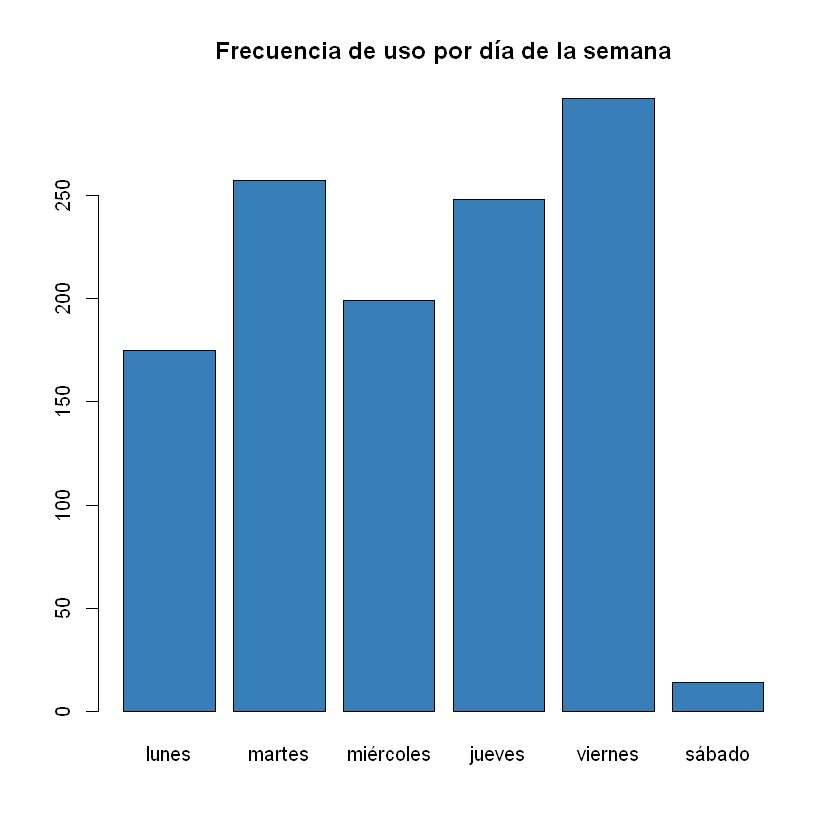

[1] 60

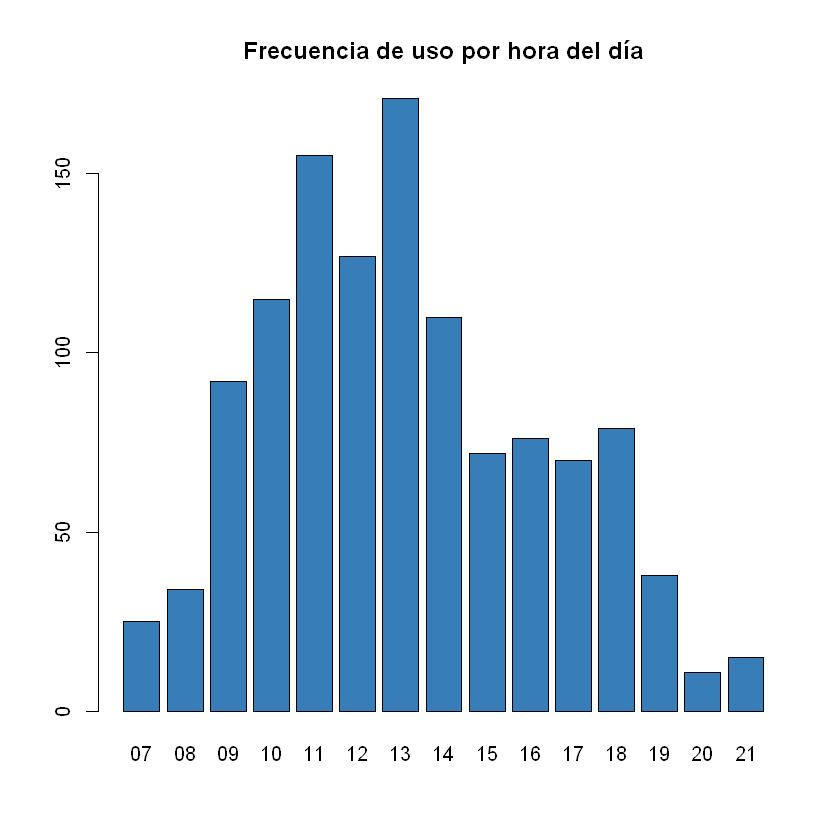

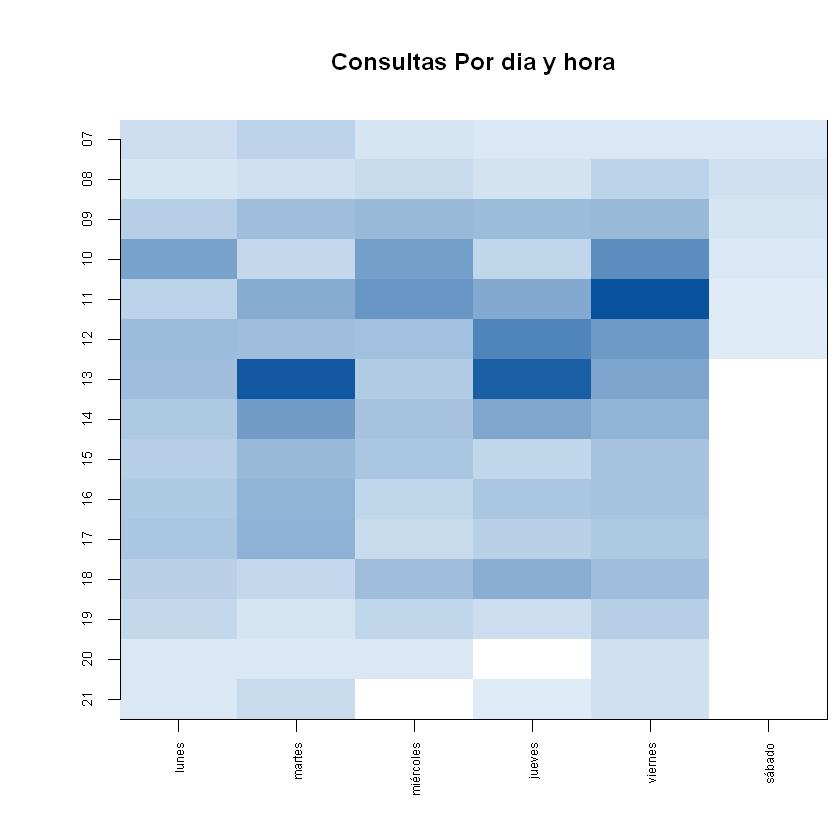

In [331]:
uso_hr_dy_tbl=(table(dia,hora));uso_hr_dy_tbl=uso_hr_dy_tbl[,order(colnames(uso_hr_dy_tbl), decreasing=T)]
#uso_hr_dy_tbl=(table(hora,dia));uso_hr_dy_tbl=uso_hr_dy_tbl[order(rownames(uso_hr_dy_tbl), decreasing=T),]

barplot(rowSums(uso_hr_dy_tbl), main="Frecuencia de uso por día de la semana", col=2)
barplot(colSums(uso_hr_dy_tbl[,order(colnames(uso_hr_dy_tbl), decreasing=F)]), main="Frecuencia de uso por hora del día", col=2)


max(uso_hr_dy_tbl)

bl_colors_4=c("white",colorRampPalette(c('#deebf7', '#08519c'))(max(uso_hr_dy_tbl)))#;X11();plot(1:length(bl_colors_4),rep(0, length(bl_colors_4)), col=bl_colors_4, pch=15, cex=1)


par(mai=c(1,1,1,.1))
image(
	uso_hr_dy_tbl, col=bl_colors_4,
	xaxt = 'n',	yaxt = 'n', main="Consultas Por dia y hora"
)
axis(
	cex.axis=0.7,
	labels=colnames(uso_hr_dy_tbl),
	side = 2,
	at=seq(0,1,length.out = length(colnames(uso_hr_dy_tbl)))
)
axis(
	las=2,cex.axis=0.6,
	labels=rownames(uso_hr_dy_tbl),
	side = 1,
	at=seq(0,1,length.out = length(rownames(uso_hr_dy_tbl)))
)
par(mai=c(1,1,1,1))

In [332]:
nm_test=data.frame(table(cons_practs$Material))
nm_test$is_tst=nm_test$Freq>0
no_test=c("")
nm_test$is_tst=!(nm_test$Var1%in%no_test)
#nm_test=edit(nm_test);View(nm_test)

nm_mater=data.frame(table(cons_practs$Asignatura))
nm_mater$is_mtr=nm_mater$Freq>0
no_asig=c("")
nm_mater$is_mtr=!(nm_mater$Var1%in%no_asig)
#nm_mater=edit(nm_mater);View(nm_mater)

consultas=cons_practs[
    cons_practs$Asignatura%in%nm_mater$Var1[nm_mater$is_mtr]&
    cons_practs$Material%in%nm_test$Var1[nm_test$is_tst],]

dat_1=consultas[consultas$Tipo_uso=="consulta",c("Semestre","Material","Asignatura")]
str(dat_1)

'data.frame':	1074 obs. of  3 variables:
 $ Semestre  : int  6 6 6 6 6 6 6 2 2 2 ...
 $ Material  : Factor w/ 122 levels "","(Maletin - Caja) MSCA Escala McCarthy de aptitudes y psicometricidad para niños_",..: 39 65 40 13 13 13 13 2 2 2 ...
 $ Asignatura: Factor w/ 107 levels "","ACTITUDES",..: 60 60 60 47 47 47 47 27 27 27 ...


Var1,Freq
NEUROPSI_,238
(Maletin) Wisc IV bateria de inteligencia para niños_,59
(Maletin) Evaluacion de la Afasia y de trastornos relacionados -TBDA_,57
(Maletin) Wais IV bateria de inteligencia para adultos_,55
D-2_Hoja de respuesta autocorregible,45
BETA_,44
Test de percepcion de diferencias (CARAS-R)_,41
(Maletin) BANFE II bateria neuropsicologica de funciones ejecutivas y lobulos frontales_,34
Inventario de Rasgos temperamentales (IRT)_,26
Test de la figura de REY_,23


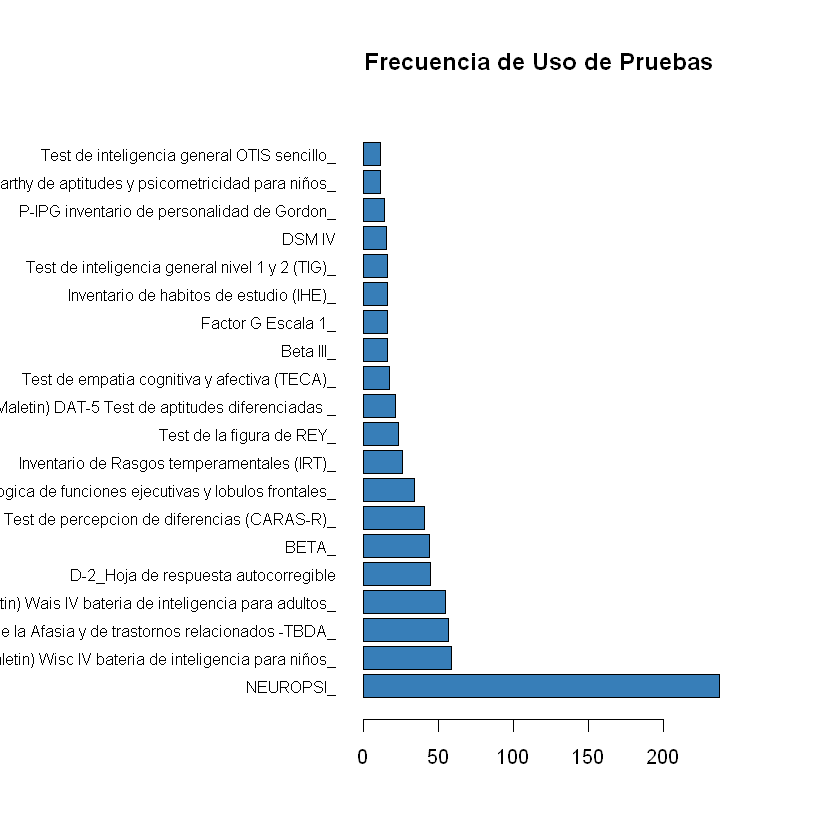

In [333]:
#####Pruebas
uso_pruebas=table(dat_1$Material)#uso_pruebas=data.frame(table(dat_1$material))
uso_pruebas=uso_pruebas[order(uso_pruebas, decreasing = T)]
uso_pruebas=uso_pruebas[uso_pruebas>0]
data.frame(uso_pruebas)
par(mai=c(1,3,1,1))
barplot(col=2,
        uso_pruebas[1:20],
        horiz=TRUE,
        las=1,
        cex.names=0.8,
        main="Frecuencia de Uso de Pruebas"
       )
par(mai=c(1,1,1,1))
# write.csv2(data.frame(uso_pruebas), "uso_pruebas_17-2_18-1.csv")

# Prácticas docentes Asignaturas

In [334]:
#####Asignatura
# En 2018-3 No se utilizó por problemas de normalización en los nombres de las asignaturas.

# uso_asignatur=table(dat_1$Asignatura)
# uso_asignatur=uso_asignatur[
#     order(uso_asignatur, decreasing = T)
# ]
# uso_asignatur=uso_asignatur[uso_asignatur>0]
# data.frame(uso_asignatur)
# par(mai=c(1,3,1,1))
# barplot(col=2,
#         uso_asignatur,
#         horiz=TRUE ,
#         las=1, 
#         cex.names=0.8, 
#         main="Frecuencia de Consulta por asignatura"
#        )
# par(mai=c(1,1,1,1))


# Registros prácticas docentes

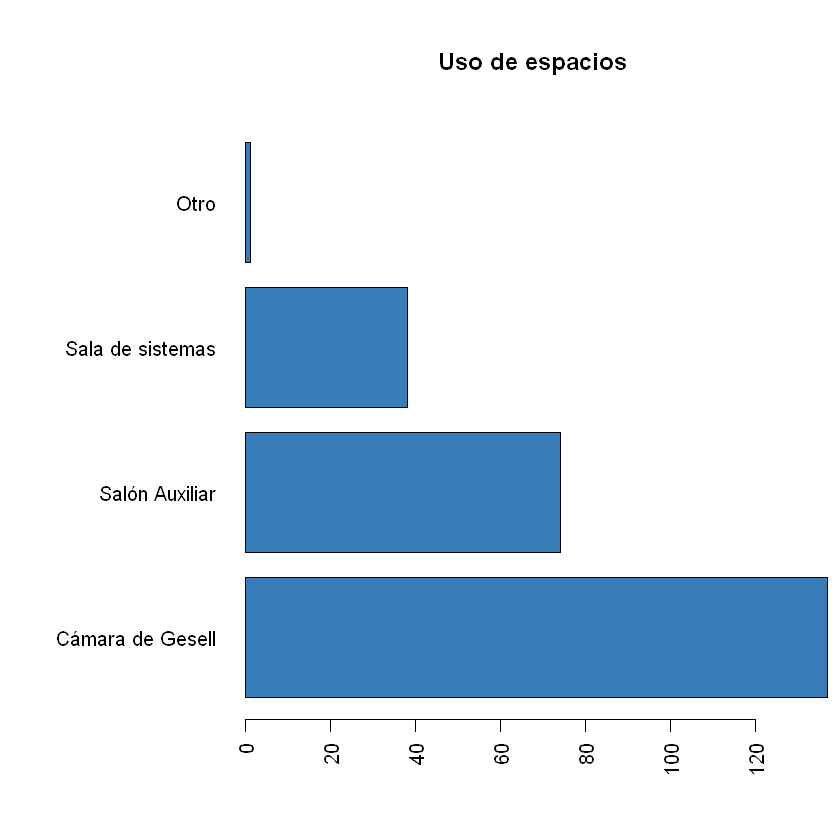

[1] 21

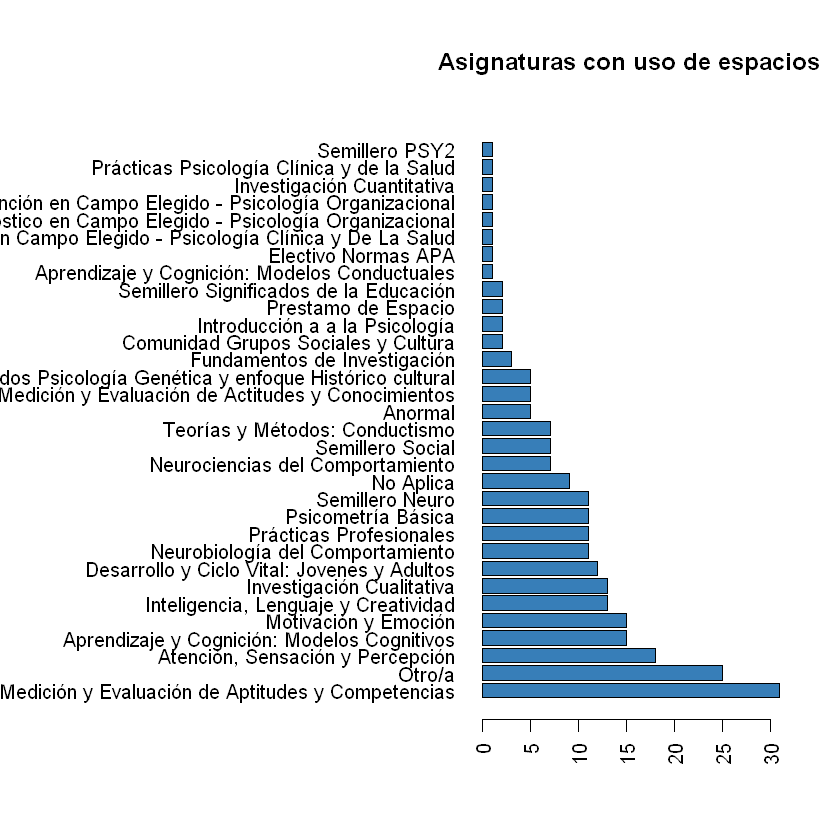

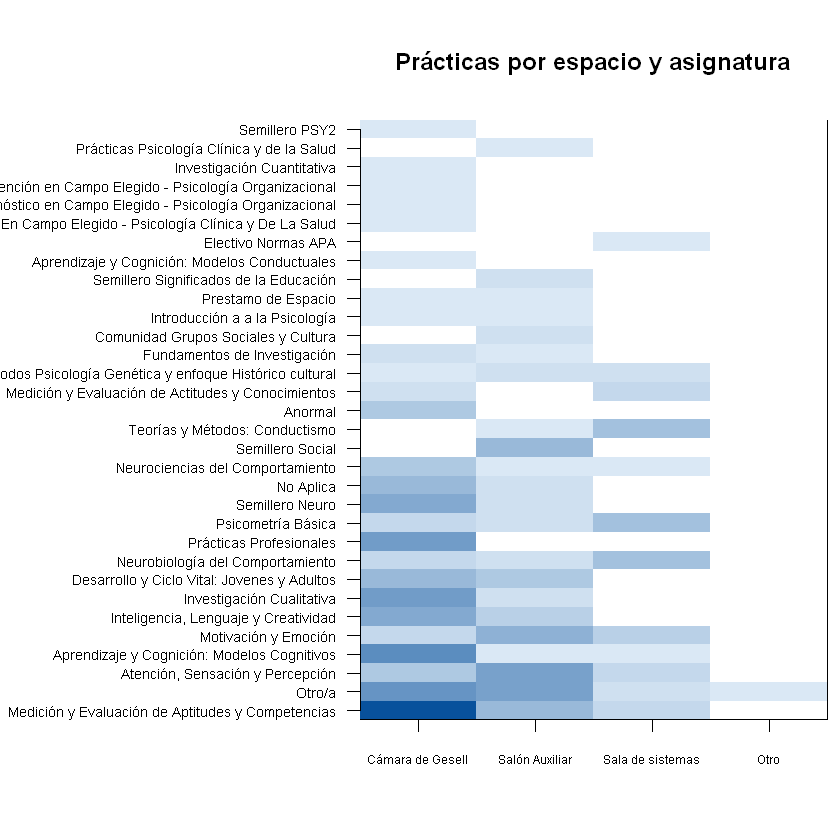

In [335]:
#####################################
####### Usos asignatura Espacio

prog_prac=read.csv2("pr_docentes.csv")#;str(prog_prac)
#prog_prac$Espacio.solicitado
prog_prac$Espacio.Solicitado=factor(prog_prac$Espacio.Solicitado, levels=c("Cámara de Gesell","Salón Auxiliar","Sala de sistemas","Otro"), ordered=T)
dat_asig_esp=prog_prac[,c("Asignatura","Espacio.Solicitado")];colnames(dat_asig_esp)=c("Asignatura", "Espacio")

uso_asig_espac=(t(table(dat_asig_esp)))
uso_asig_espac=uso_asig_espac[,order(colSums(uso_asig_espac), decreasing=T)]

#write.csv2(t(uso_asig_espac), file="uso espacio asig.csv")

par(mai=c(1,2,1,.1))
barplot(rowSums(uso_asig_espac),horiz=T, las=2, main="Uso de espacios", col=2)

par(mai=c(1,4,1,.5))
barplot(colSums(uso_asig_espac),horiz=T, las=2, main="Asignaturas con uso de espacios", col=2)
par(mai=c(1,1,1,1))

max(uso_asig_espac)

bl_colors_5=c("white",colorRampPalette(c('#deebf7', '#08519c'))(max(uso_asig_espac)))#;X11();plot(1:length(bl_colors_5),rep(0, length(bl_colors_5)), col=bl_colors_5, pch=16, cex=15)


par(mai=c(1,3,1,.1))
image(
	uso_asig_espac, col=bl_colors_4,
	xaxt = 'n',	yaxt = 'n', main="Prácticas por espacio y asignatura"
)
axis(
	las=2,
	cex.axis=0.7,
	labels=colnames(uso_asig_espac),
	side = 2,
	at=seq(0,1,length.out = length(colnames(uso_asig_espac)))
)
axis(
	cex.axis=0.6,
	labels=rownames(uso_asig_espac),
	side = 1,
	at=seq(0,1,length.out = length(rownames(uso_asig_espac)))
)
par(mai=c(1,1,1,1))

In [336]:
length(table(prog_prac$Nombre.Del.Docente.o.Administrativo))
length(table(prog_prac$Asignatura))
tbl=table(prog_prac$Nombre.Del.Docente.o.Administrativo, prog_prac$Asignatura,prog_prac$No..Grupo)

[1] 51

[1] 32

In [337]:
pr_doc_asig=data.frame(Docente=prog_prac$Nombre.Del.Docente.o.Administrativo,
                       Asignatura=prog_prac$Asignatura,
                       Grupo=prog_prac$No..Grupo,
                       Ocurrencia=rep("Ejecución",length(prog_prac$Asignatura)))

In [338]:
ejecuciones=dcast(pr_doc_asig,Docente+Asignatura+Grupo~Ocurrencia)
ejecuciones
# write.csv2(ejecuciones, "ejecuciones_pr_doc.csv")


Using Ocurrencia as value column: use value.var to override.
Aggregation function missing: defaulting to length


Docente,Asignatura,Grupo,Ejecución
Adriana Suarez,Medición y Evaluación de Aptitudes y Competencias,521,2
Adriana Suarez,Psicometría Básica,423,2
Andres Gamba,Semillero PSY2,,1
Angela Alarcon,Psicometría Básica,421,1
Angela Alarcon,Psicometría Básica,422,1
Angela Maria Polanco,Neurociencias del Comportamiento,323,1
Angelo Cardona,Aprendizaje y Cognición: Modelos Conductuales,522,1
Angelo Cardona,Teorías y Métodos: Conductismo,402,2
Angelo Cardona,Teorías y Métodos: Conductismo,404,2
Angelo Cardona,Teorías y Métodos: Conductismo,423,2


# Tutorias

In [340]:
tutorias=read.csv2("tutorias.csv")
tutorias=tutorias[,3:ncol(tutorias)]
colnames(tutorias)=c("Nombre",
                     "Código",
                     "Semestre",
                     "Fecha",
                     "Hora",
                     "Asignatura",                        
                     "Tema",
                     "Asesor",
                     "Corte")
str(tutorias)

'data.frame':	790 obs. of  9 variables:
 $ Nombre    : Factor w/ 530 levels "Acosta Antonio",..: 93 75 58 265 413 520 181 485 22 379 ...
 $ Código    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Semestre  : int  NA 10 10 10 10 10 10 10 10 10 ...
 $ Fecha     : Factor w/ 66 levels "","01/10/18",..: 54 18 18 18 18 18 18 18 18 18 ...
 $ Hora      : Factor w/ 280 levels "","1:00","1:01",..: 73 175 175 175 208 214 214 1 215 221 ...
 $ Asignatura: Factor w/ 79 levels ""," Psicología",..: 78 75 75 75 61 61 61 61 61 61 ...
 $ Tema      : Factor w/ 198 levels "","Afasia","Afasia Auditiva",..: 71 175 175 175 19 19 19 19 19 19 ...
 $ Asesor    : Factor w/ 19 levels "","Alexis Carrillo",..: 2 3 3 3 3 3 3 3 3 3 ...
 $ Corte     : int  1 1 1 1 1 1 1 1 1 1 ...


In [341]:
#####################################
####### Usos Hora Dia
fch_tut=strptime(paste(tutorias$Fecha,tutorias$Hora), "%d/%m/%Y %H:%M:%S")
dia_tut=weekdays(fch)
dia_tut=factor(dia, levels=c("lunes","martes","miércoles","jueves","viernes","sábado"), ordered=T)
hora_tut=format(fch, "%H")


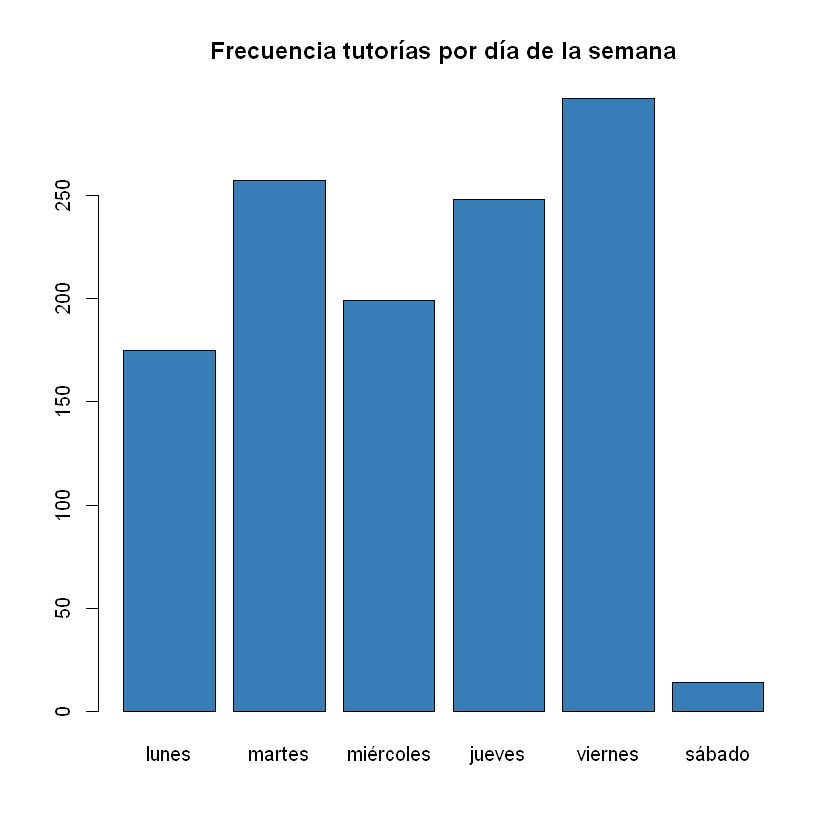

[1] 60

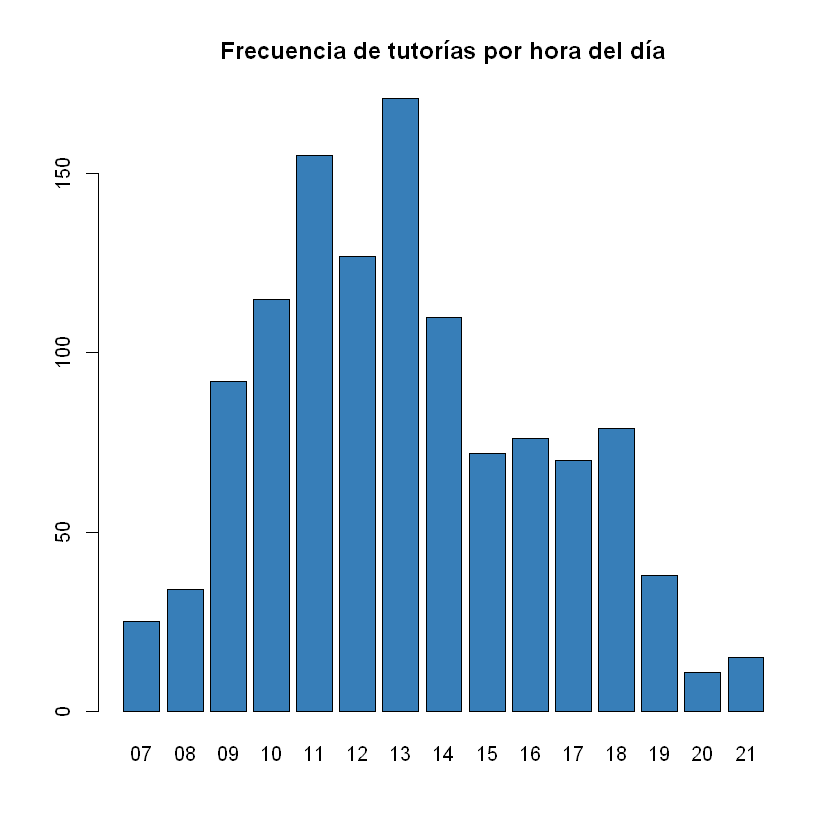

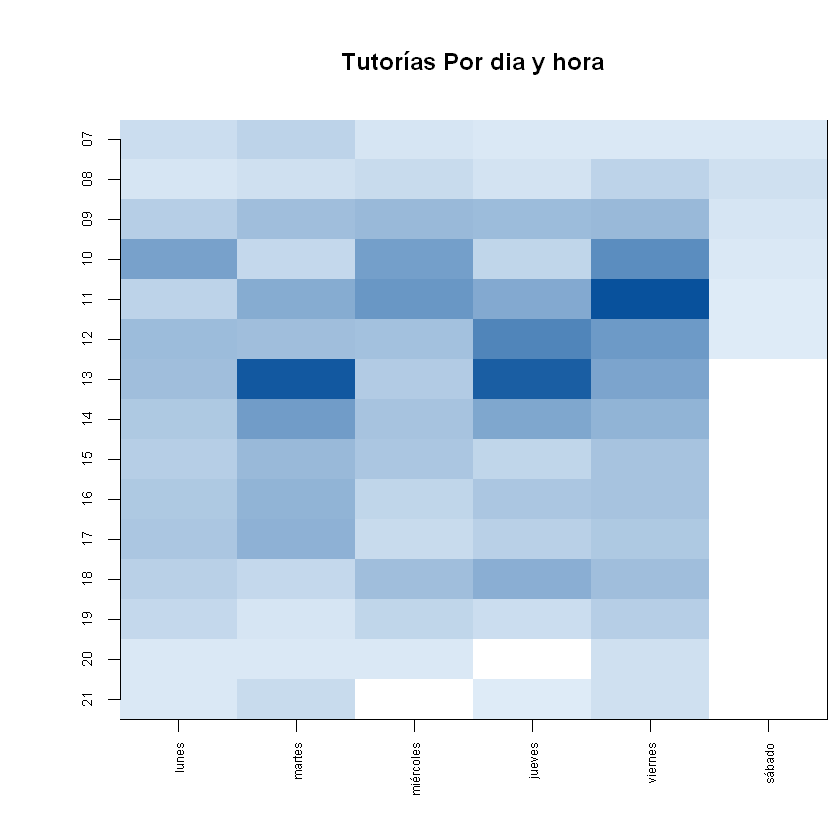

In [342]:
uso_hr_dy_tbl_tut=(table(dia_tut,hora_tut));uso_hr_dy_tbl_tut=uso_hr_dy_tbl_tut[,order(colnames(uso_hr_dy_tbl_tut), decreasing=T)]
#uso_hr_dy_tbl=(table(hora,dia));uso_hr_dy_tbl=uso_hr_dy_tbl[order(rownames(uso_hr_dy_tbl), decreasing=T),]

barplot(rowSums(uso_hr_dy_tbl_tut), main="Frecuencia tutorías por día de la semana", col=2)
barplot(colSums(uso_hr_dy_tbl_tut[,order(colnames(uso_hr_dy_tbl_tut), decreasing=F)]), main="Frecuencia de tutorías por hora del día", col=2)


max(uso_hr_dy_tbl_tut)

bl_colors_4_tut=c("white",colorRampPalette(c('#deebf7', '#08519c'))(max(uso_hr_dy_tbl_tut)))#;X11();plot(1:length(bl_colors_4),rep(0, length(bl_colors_4)), col=bl_colors_4, pch=15, cex=1)


par(mai=c(1,1,1,.1))
image(
	uso_hr_dy_tbl_tut, col=bl_colors_4_tut,
	xaxt = 'n',	yaxt = 'n', main="Tutorías Por dia y hora"
)
axis(
	cex.axis=0.7,
	labels=colnames(uso_hr_dy_tbl_tut),
	side = 2,
	at=seq(0,1,length.out = length(colnames(uso_hr_dy_tbl_tut)))
)
axis(
	las=2,cex.axis=0.6,
	labels=rownames(uso_hr_dy_tbl_tut),
	side = 1,
	at=seq(0,1,length.out = length(rownames(uso_hr_dy_tbl_tut)))
)
par(mai=c(1,1,1,1))

In [343]:
str(tutorias)

'data.frame':	790 obs. of  9 variables:
 $ Nombre    : Factor w/ 530 levels "Acosta Antonio",..: 93 75 58 265 413 520 181 485 22 379 ...
 $ Código    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Semestre  : int  NA 10 10 10 10 10 10 10 10 10 ...
 $ Fecha     : Factor w/ 66 levels "","01/10/18",..: 54 18 18 18 18 18 18 18 18 18 ...
 $ Hora      : Factor w/ 280 levels "","1:00","1:01",..: 73 175 175 175 208 214 214 1 215 221 ...
 $ Asignatura: Factor w/ 79 levels ""," Psicología",..: 78 75 75 75 61 61 61 61 61 61 ...
 $ Tema      : Factor w/ 198 levels "","Afasia","Afasia Auditiva",..: 71 175 175 175 19 19 19 19 19 19 ...
 $ Asesor    : Factor w/ 19 levels "","Alexis Carrillo",..: 2 3 3 3 3 3 3 3 3 3 ...
 $ Corte     : int  1 1 1 1 1 1 1 1 1 1 ...


Var1,Freq
Jorge Moreno,362
Alexis Carrillo,138
Leidy López,70
Katerine Chavarro,68
Daniel Bonilla,43
Luisa Pardo,35
,24
Johana Duran,19
Jorge Moreno,8
Jenifer Garzon,7


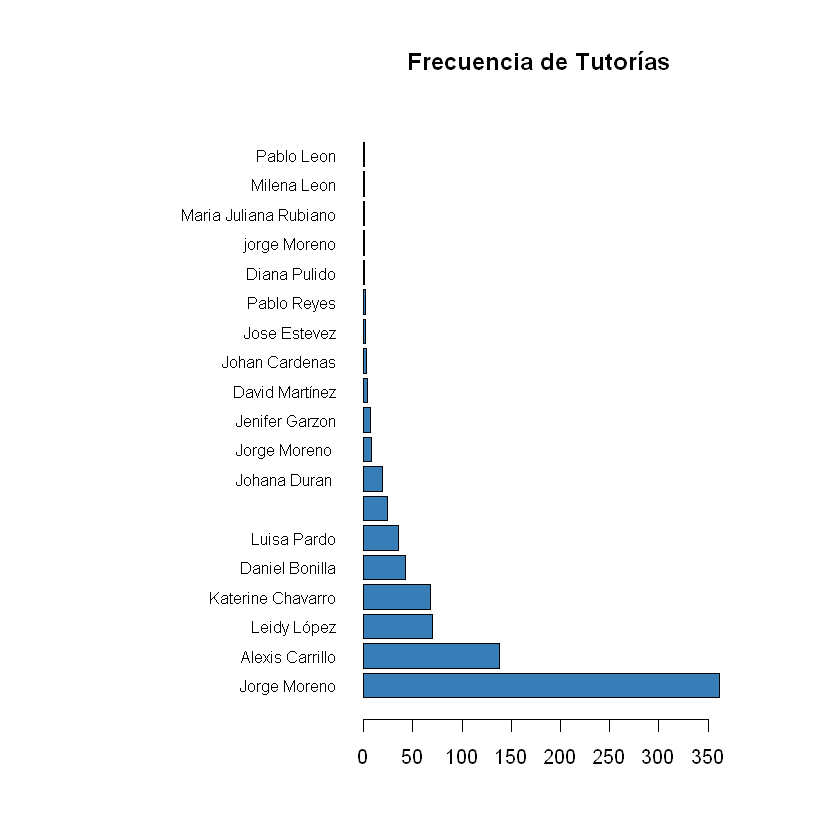

In [349]:
fr_tutorias=table(tutorias$Asesor)#uso_pruebas=data.frame(table(dat_1$material))
fr_tutorias=fr_tutorias[order(fr_tutorias, decreasing = T)]
fr_tutorias=fr_tutorias[fr_tutorias>0]
data.frame(fr_tutorias)
par(mai=c(1,3,1,1))
barplot(col=2,
        fr_tutorias,#[1:20],
        horiz=TRUE,
        las=1,
        cex.names=0.8,
        main="Frecuencia de Tutorías"
       )
par(mai=c(1,1,1,1))
# write.csv2(data.frame(uso_pruebas), "uso_pruebas_17-2_18-1.csv")

# Ventas

In [345]:
ventas=read.csv2("ventas.csv");
str(ventas)

'data.frame':	126 obs. of  5 variables:
 $ Prueba                     : Factor w/ 39 levels "Actitudes y estrategias congnitivo sociales (AECS)",..: 5 11 11 11 1 36 10 1 38 7 ...
 $ Material..Disponible.2018.3: Factor w/ 51 levels "Cuadernillo - Beta III",..: 9 38 38 38 21 45 32 21 49 27 ...
 $ Cantidad                   : int  1 1 1 1 7 1 1 1 1 1 ...
 $ Total                      : int  14900 12100 12100 12100 52500 6350 7800 7500 8600 6600 ...
 $ Fecha                      : Factor w/ 37 levels "1/10/2018","10/09/2018",..: 7 29 29 31 33 33 33 2 17 19 ...


In [346]:
regs_ventas=data.frame(Unidades=tapply(ventas$Cantidad, ventas$Prueba, sum),
                       Valor=tapply(ventas$Total, ventas$Prueba, sum))
regs_ventas
# write.csv2(regs_ventas,"regs_ventas.csv")
regs_ventas$Prueba=rownames(regs_ventas)

,Unidades,Valor
Actitudes y estrategias congnitivo sociales (AECS),8,60000
BANFE II bateria neuropsicologica de funciones ejecutivas y lobulos frontales,2,33400
Bateria de socializacion (BAS-3),1,12000
Beta III,3,32100
Busqueda autodirigida (SDS) FORMA J,4,52400
CREA,1,11600
Cuestionario de ansiedad estado - rasgo (STAI),2,13200
Cuestionario de personalidad para niños y adultos (EPQ-A),1,12600
Cuestionario de valores personales (SPV),3,51900
D-2Hoja de respuesta autocorregible,13,101400


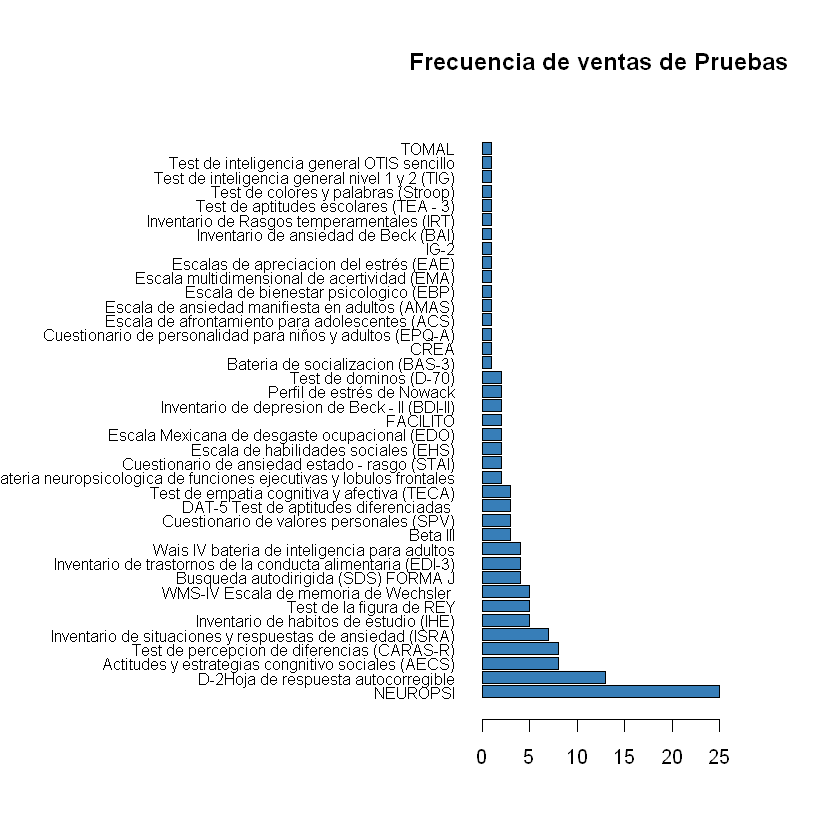

In [347]:
Unids_vendidas=regs_ventas[order(regs_ventas$Unidades, decreasing = T),]
par(mai=c(1,4,1,1))
barplot(col=2,
        Unids_vendidas$Unidad,#[1:20],
        horiz=TRUE,
        las=1,
        names.arg = Unids_vendidas$Prueba,
        cex.names=0.8,
        main="Frecuencia de ventas de Pruebas"
       )
par(mai=c(1,1,1,1))

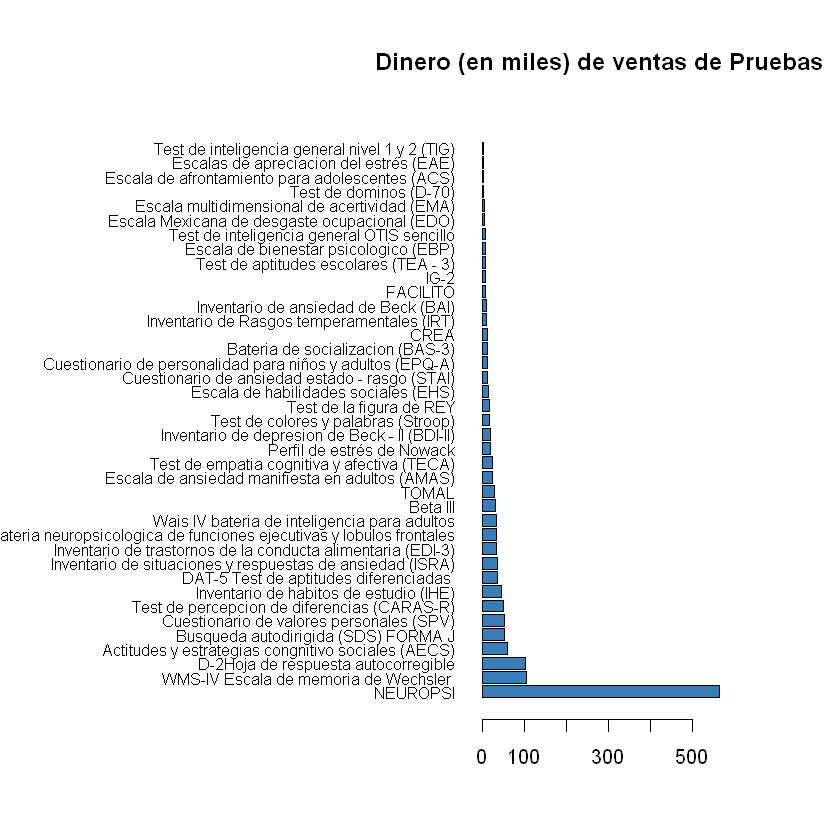

In [348]:
Cants_vendidas=regs_ventas[order(regs_ventas$Valor, decreasing = T),]
par(mai=c(1,4,1,1))
barplot(col=2,
        Cants_vendidas$Valor/1000,#[1:20],
        horiz=TRUE,
        las=1,
        names.arg = Cants_vendidas$Prueba,
        cex.names=0.8,
        main="Dinero (en miles) de ventas de Pruebas"
       )
par(mai=c(1,1,1,1))